In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef
from collections import defaultdict
import numpy as np
import utils
import matplotlib.pyplot as plt
import math


In [2]:
#class TwoLayerNet(nn.Module):
#    def __init__(self, input_size):
#        super(TwoLayerNet, self).__init__()
#        self.fc1 = nn.Linear(input_size, 20)
#        self.relu = nn.ReLU()
#        self.fc2 = nn.Linear(20, 1)
#        self.sigmoid = nn.Sigmoid()

#    def forward(self, x):
#        x = self.fc1(x)
#        x = self.relu(x)
#        x = self.fc2(x)
#        x = self.sigmoid(x)
#        return x

In [3]:
path = r"../data_files/ecq_B_1000_all_one_per_iso_1_524287.parquet"
df = utils.load_data(path)

#divide among high and low rank (0&1 low, 2&3 high)
#df['rank'] = df['rank'].apply(lambda x: 0 if x < 2 else 1)


Loaded the big dataset with 1000 a_p's and 2164705 curves..


Import utilities and obtain dictionary of accuracies

In [7]:
# choose your desired bounds (including the end points)
#bounds_list = [(i**2-600, i**2+600) for i in range(50, 370, 10)]
bounds_list = [(2**i, 2**(i+1)) for i in range(10, 30)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 10
res_dict={}

# Obtain dictionary of conductor bounds and corresponding number of ap values
for bounds in bounds_list:
    lower_bound, upper_bound = bounds
    #bound = int(np.sqrt((upper_bound + lower_bound) / 2))
    bound = math.log(lower_bound, 2)
    cumulative_dict = defaultdict(lambda: [0, 0])  # [cumulative sum, count]

    for i in range(1):  # Repeat x times
        res_df = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size=step_size, metric = matthews_corrcoef)
        temp_dict = utils.find_min_num_a_p_for_accuracy_thresholds(res_df)
        
        # Update cumulative sums and counts, checking for NaN
        for key, value in temp_dict.items():
            if not np.isnan(value):  # Check if value is not NaN
                cumulative_dict[key][0] += value
                cumulative_dict[key][1] += 1

    # Calculate averages and assign to res_dict, excluding keys with NaN values
    res_dict[bound] = {key: sum_count[0] / sum_count[1] for key, sum_count in cumulative_dict.items() if sum_count[1] > 0}

    print(f"Conductor with exponent {bound} needs the following number of ap values: {res_dict[bound]}")


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1024, 2048]..
There are 579 curves within the conductor range [1024, 2048].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 10.0 needs the following number of ap values: {0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2048, 4096]..
There are 940 curves within the conductor range [2048, 4096].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 11.0 needs the following number of ap values: {0.99: 30.0, 0.98: 30.0, 0.95: 30.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4096, 8192]..
There are 1540 curves within the conductor range [4096, 8192].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 12.0 needs the following number of ap values: {0.99: 50.0, 0.98: 30.0, 0.95: 20.0, 0.9: 10.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8192, 16384]..
There are 2452 curves within the conductor range [8192, 16384].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 13.0 needs the following number of ap values: {0.98: 40.0, 0.95: 20.0, 0.9: 20.0, 0.85: 10.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [16384, 32768]..
There are 3812 curves within the conductor range [16384, 32768].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 14.0 needs the following number of ap values: {0.95: 40.0, 0.9: 20.0, 0.85: 20.0, 0.8: 10.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [32768, 65536]..
There are 5718 curves within the conductor range [32768, 65536].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 15.0 needs the following number of ap values: {0.95: 70.0, 0.9: 30.0, 0.85: 20.0, 0.8: 20.0, 0.75: 10.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [65536, 131072]..
There are 7943 curves within the conductor range [65536, 131072].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 16.0 needs the following number of ap values: {0.95: 190.0, 0.9: 40.0, 0.85: 20.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [131072, 262144]..
There are 10027 curves within the conductor range [131072, 262144].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 17.0 needs the following number of ap values: {0.95: 130.0, 0.9: 40.0, 0.85: 30.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [262144, 524288]..
There are 13006 curves within the conductor range [262144, 524288].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 18.0 needs the following number of ap values: {0.95: 340.0, 0.9: 50.0, 0.85: 30.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [524288, 1048576]..
There are 16532 curves within the conductor range [524288, 1048576].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 19.0 needs the following number of ap values: {0.9: 60.0, 0.85: 40.0, 0.8: 20.0, 0.75: 20.0, 0.7: 20.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1048576, 2097152]..
There are 18391 curves within the conductor range [1048576, 2097152].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 20.0 needs the following number of ap values: {0.9: 50.0, 0.85: 30.0, 0.8: 20.0, 0.75: 20.0, 0.7: 10.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2097152, 4194304]..
There are 22498 curves within the conductor range [2097152, 4194304].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 21.0 needs the following number of ap values: {0.9: 90.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 10.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4194304, 8388608]..
There are 24752 curves within the conductor range [4194304, 8388608].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 22.0 needs the following number of ap values: {0.9: 120.0, 0.85: 50.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [8388608, 16777216]..
There are 26026 curves within the conductor range [8388608, 16777216].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 23.0 needs the following number of ap values: {0.9: 70.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [16777216, 33554432]..
There are 28254 curves within the conductor range [16777216, 33554432].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 24.0 needs the following number of ap values: {0.9: 100.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [33554432, 67108864]..
There are 30680 curves within the conductor range [33554432, 67108864].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 25.0 needs the following number of ap values: {0.9: 100.0, 0.85: 50.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 10.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [67108864, 134217728]..
There are 32035 curves within the conductor range [67108864, 134217728].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 26.0 needs the following number of ap values: {0.9: 90.0, 0.85: 40.0, 0.8: 30.0, 0.75: 20.0, 0.7: 20.0, 0.65: 20.0, 0.6: 20.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [134217728, 268435456]..
There are 34338 curves within the conductor range [134217728, 268435456].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 27.0 needs the following number of ap values: {0.9: 150.0, 0.85: 60.0, 0.8: 40.0, 0.75: 30.0, 0.7: 20.0, 0.65: 20.0, 0.6: 20.0, 0.55: 10.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [268435456, 536870912]..
There are 35985 curves within the conductor range [268435456, 536870912].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 28.0 needs the following number of ap values: {0.9: 240.0, 0.85: 80.0, 0.8: 50.0, 0.75: 30.0, 0.7: 30.0, 0.65: 20.0, 0.6: 20.0, 0.55: 20.0, 0.5: 10.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [536870912, 1073741824]..
There are 36195 curves within the conductor range [536870912, 1073741824].


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


Conductor with exponent 29.000000000000004 needs the following number of ap values: {0.9: 550.0, 0.85: 90.0, 0.8: 50.0, 0.75: 40.0, 0.7: 30.0, 0.65: 20.0, 0.6: 20.0, 0.55: 20.0, 0.5: 20.0, 0.45: 10.0, 0.4: 10.0, 0.35: 10.0, 0.3: 10.0}


Restructure the dictionary

In [8]:
# Initialize an empty dictionary to store the result
restructured_dict = {0.99: [], 0.98: [], 0.95: [], 0.9: [], 0.85: [], 0.8: [], 0.75: [], 0.7: [], 
                     0.65:[], 0.6: [], 0.55: [], 0.5: [], 0.45: [], 0.4: [], 0.35: [], 0.3: []}


# Iterate through the original dictionary
for k, subdict in res_dict.items():
    # Iterate through each accuracy level in the restructured dictionary
    for accuracy in restructured_dict:
        # Check if the accuracy level exists in the subdictionary
        if accuracy in subdict:
            # Append the (k, v) pair to the corresponding list in the restructured dictionary
            restructured_dict[accuracy].append((k, subdict[accuracy]))



In [10]:
# Function to process each list of pairs
def process_pairs(pairs):
    # Group by Y-value
    grouped_by_y = defaultdict(list)
    for x, y in pairs:
        grouped_by_y[y].append(x)
    
    # Calculate average X for each Y and create new pairs
    new_pairs = [(sum(xs) / len(xs), y) for y, xs in grouped_by_y.items()]
    
    return new_pairs

# Process each key in the dictionary
restructured_dict1 = {key: process_pairs(value) for key, value in restructured_dict.items()}

print(restructured_dict1)

{0.99: [(11.0, 30.0), (12.0, 50.0)], 0.98: [(11.5, 30.0), (13.0, 40.0)], 0.95: [(11.0, 30.0), (12.5, 20.0), (14.0, 40.0), (15.0, 70.0), (16.0, 190.0), (17.0, 130.0), (18.0, 340.0)], 0.9: [(11.0, 10.0), (13.5, 20.0), (15.0, 30.0), (16.5, 40.0), (19.0, 50.0), (19.0, 60.0), (23.5, 90.0), (22.0, 120.0), (23.0, 70.0), (24.5, 100.0), (27.0, 150.0), (28.0, 240.0), (29.000000000000004, 550.0)], 0.85: [(11.5, 10.0), (15.0, 20.0), (18.333333333333332, 30.0), (22.6, 40.0), (23.5, 50.0), (27.0, 60.0), (28.0, 80.0), (29.000000000000004, 90.0)], 0.8: [(12.0, 10.0), (17.5, 20.0), (23.5, 30.0), (27.0, 40.0), (28.5, 50.0)], 0.75: [(12.5, 10.0), (21.0, 20.0), (27.5, 30.0), (29.000000000000004, 40.0)], 0.7: [(14.6, 10.0), (23.375, 20.0), (28.5, 30.0)], 0.65: [(15.5, 10.0), (25.5, 20.0)], 0.6: [(17.5, 10.0), (27.5, 20.0)], 0.55: [(18.5, 10.0), (28.5, 20.0)], 0.5: [(19.0, 10.0), (29.000000000000004, 20.0)], 0.45: [(19.5, 10.0)], 0.4: [(19.5, 10.0)], 0.35: [(19.5, 10.0)], 0.3: [(19.5, 10.0)]}


For each accuracy threshold, plot points (square root of conductor, required number of ap's) in a different color, then fit a line for each separate threshold.

<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_97062/411626077.py:37: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log_2(Conductor)$')
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_97062/411626077.py:38: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log_2$(Required number of ap's)")
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_97062/411626077.py:18: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x_np, y_np, 1)
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_97062/411626077.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_97062/411626077.py:18: RankWarning: Polyfit may be poorly

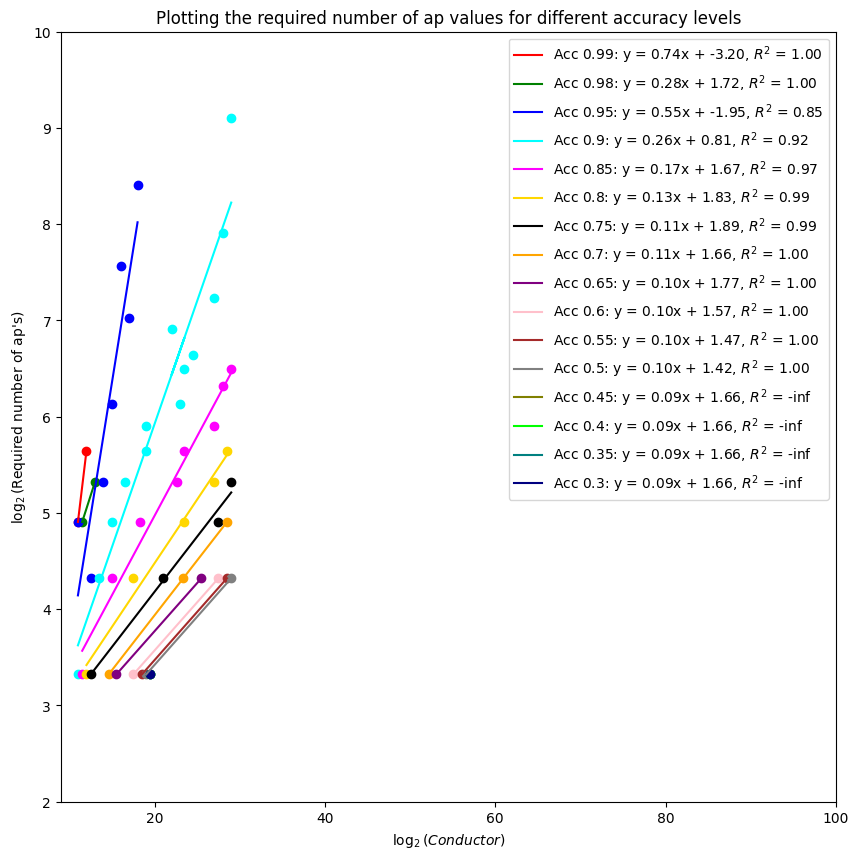

In [11]:
# Define colors for each subdictionary
colors = {0.99:'red', 0.98: 'green', 0.95: 'blue', 0.9: 'cyan', 0.85: 'magenta', 0.8: 'gold', 0.75: 'black', 0.7: 'orange',
          0.65: 'purple', 0.6: 'pink', 0.55: 'brown', 0.5: 'gray', 0.45: 'olive', 0.4: 'lime', 0.35: 'teal', 0.3: 'navy'}

plt.figure(figsize=(10, 10))

for accuracy, pairs in restructured_dict1.items():
    if accuracy!=1:
    # Remove pairs with 'nan' values
        cleaned_pairs = [(x, y) for x, y in pairs if y > 0]
        if cleaned_pairs:
            x_vals, y_vals = zip(*cleaned_pairs)
            y_vals = [math.log(y, 2) for y in y_vals]
            # Convert to numpy arrays for linear regression
            x_np = np.array(x_vals, dtype=np.float64)
            y_np = np.array(y_vals, dtype=np.float64)
            # Calculate the coefficients of the line of best fit
            m, b = np.polyfit(x_np, y_np, 1)
            # Calculate predictions
            y_pred = m * x_np + b

            # Calculate R^2
            ss_res = np.sum((y_np - y_pred) ** 2)
            ss_tot = np.sum((y_np - np.mean(y_np)) ** 2)
            r_squared = 1 - (ss_res / ss_tot)

            # Plot the cleaned scatter plot
            plt.scatter(x_vals, y_vals, color=colors[accuracy])
            # Plot the line of best fit
            plt.plot(x_np, y_pred, color=colors[accuracy], label=f'Acc {accuracy}: y = {m:.2f}x + {b:.2f}, $R^2$ = {r_squared:.2f}')

# Set the limits of the x and y axes
plt.xlim(9, 100)
plt.ylim(2, 10)

# Add labels and legend
plt.xlabel('$\log_2(Conductor)$')
plt.ylabel("$\log_2$(Required number of ap's)")
plt.title('Plotting the required number of ap values for different accuracy levels')
plt.legend()

# Show the plot
plt.show()

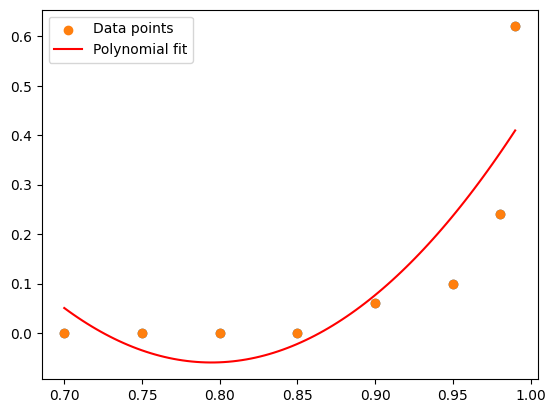

In [11]:
accs=np.array([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99])
slopes = np.array([0, 0, 0, 0, 0.06, 0.1, 0.24, 0.62])
plt.scatter(accs, slopes)
a, b, c= np.polyfit(accs, slopes, 2)
# Create a polynomial function from the coefficients
p = np.poly1d([a, b, c])

# Generate a range of x-values for plotting the polynomial
x_range = np.linspace(accs.min(), accs.max(), 100)

# Calculate the corresponding y-values using the polynomial function
y_poly = p(x_range)

# Plotting
plt.scatter(accs, slopes, label='Data points')
plt.plot(x_range, y_poly, color='red', label='Polynomial fit')
plt.legend()
plt.show()


In [12]:
p(1)

np.float64(0.4589620136175325)